In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import normalize
import seaborn as sns

#### Laplace

In [2]:
start = 0
end = 10
ls = 0.02
period = 1
t = np.arange(start, end, ls)
funtion_of_time = np.sin(3* 2 * np.pi / period * t)

no_of_sample = len(t)

u = np.ones(no_of_sample)
u[np.arange(start, end, ls)<0] = 0

sample_freq = fftfreq(no_of_sample, d=ls/period)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]

In [ ]:
start = 0
end = 10
ls = 0.02
t = np.arange(start, end, ls)
funtion_of_time = np.sin(3* 2 * np.pi * t)

no_of_sample = len(t)

u = np.ones(no_of_sample)
u[np.arange(start, end, ls)<0] = 0

sample_freq = fftfreq(no_of_sample, d=ls)
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]

In [21]:
t.size

500

In [4]:
ls/period

0.02

In [5]:
no_of_sample

500

In [6]:
1/no_of_sample/(end-start)

0.0002

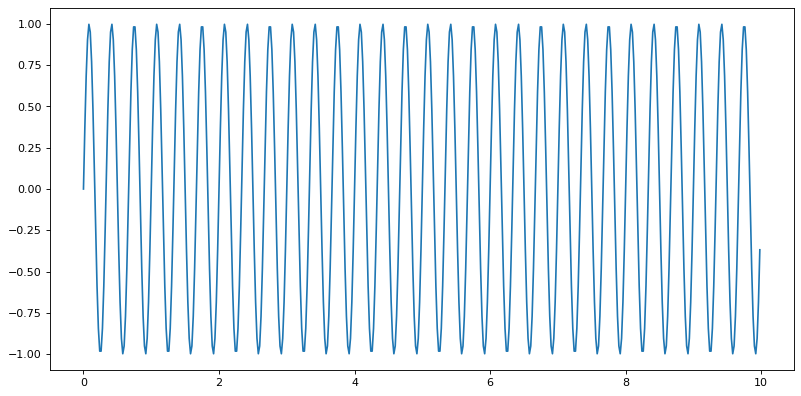

In [7]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(t, funtion_of_time);

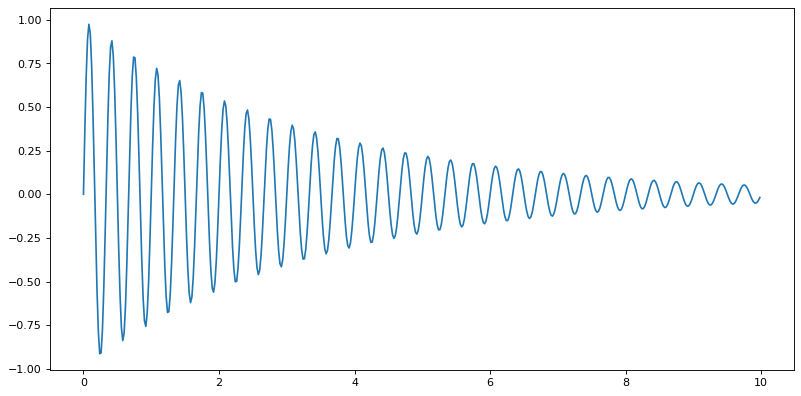

In [8]:
alpha=0.3
funtion_of_time_laplace = u * np.exp(-1*alpha*t)*funtion_of_time
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(t,funtion_of_time_laplace)
plt.show();

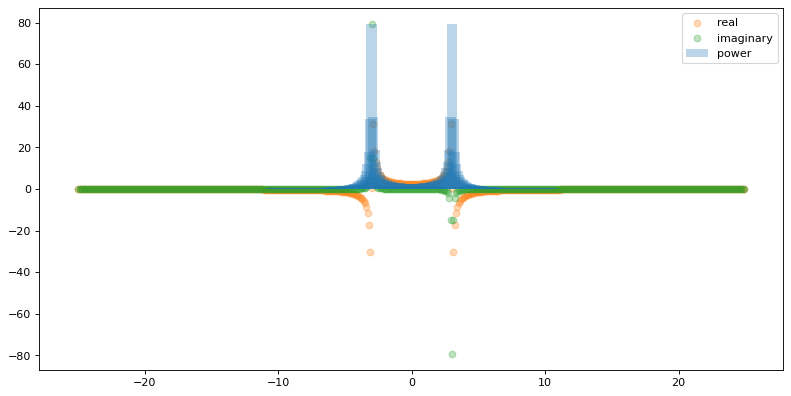

In [9]:
#funtion_of_s = fftshift(fft(fftshift(funtion_of_time_laplace)))
funtion_of_s = fft(funtion_of_time_laplace)
power = np.abs(funtion_of_s)
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(sample_freq, power, alpha=0.3, label="power")
plt.scatter(sample_freq, funtion_of_s.real, alpha=0.3, label="real")
plt.scatter(sample_freq, funtion_of_s.imag, alpha=0.3, label="imaginary")
plt.legend()
plt.show();

In [10]:
peak_freq = freqs[power[pos_mask].argmax()]
peak_power = power[power[pos_mask].argmax()]

In [11]:
alphas = np.arange(-5, 5, 0.25)
for i in range(len(alphas)):
    alpha=alphas[i]
    lap = u * np.exp(-1*alpha*t) * funtion_of_time
    fft_lap = fft(lap)
    if i == 0:
        lt = fft_lap.reshape(1,-1)
    else:
        lt = np.append(lt, fft_lap.reshape(1,-1), axis=0)

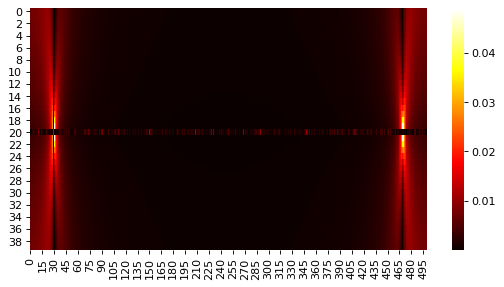

In [12]:
data = np.abs(np.real(lt))
normed_data = normalize(data, axis=1, norm='l1')
plt.figure(figsize=(8, 4), dpi=80)
sns.heatmap(normed_data, cmap='hot')

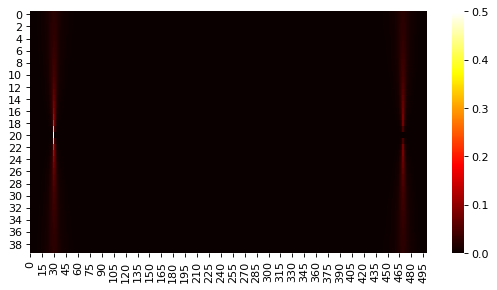

In [13]:
data = np.abs(np.imag(lt))
normed_data = normalize(data, axis=1, norm='l1')
plt.figure(figsize=(8, 4), dpi=80)
sns.heatmap(normed_data, cmap='hot')

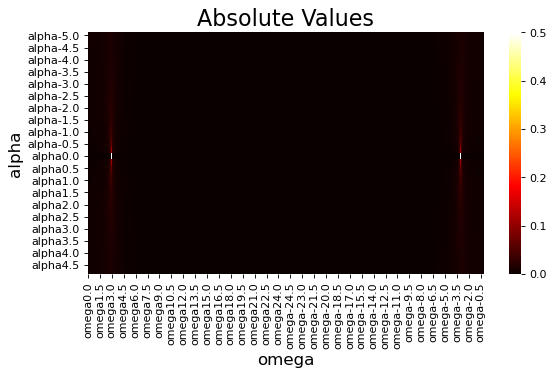

In [14]:
data = np.abs(lt)
normed_data = normalize(data, axis=1, norm='l1')
data = pd.DataFrame(normed_data, columns=["omega"+str(i) for i in sample_freq], index=["alpha"+str(i) for i in alphas])
plt.figure(figsize=(8, 4), dpi=80)
sns.heatmap(data, cmap='hot')
plt.title('Absolute Values', fontsize = 20)
plt.xlabel('omega', fontsize = 15)
plt.ylabel('alpha', fontsize = 15)
plt.show();

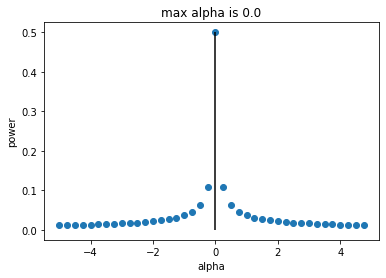

In [15]:
maxpower_wrt_alpha = data.values.argmax(axis=1)
maxpower_wrt_alpha = [data.values[i,maxpower_wrt_alpha[i]] for i in range(len(alphas))]
plt.scatter(alphas, maxpower_wrt_alpha)
plt.vlines(x=alphas[np.array(maxpower_wrt_alpha).argmax()],
           ymin=0,
           ymax=maxpower_wrt_alpha[np.array(maxpower_wrt_alpha).argmax()])
plt.ylabel("power")
plt.xlabel("alpha")
plt.title("max alpha is {}".format(alphas[np.array(maxpower_wrt_alpha).argmax()]))
plt.show();

In [16]:
np.array(maxpower_wrt_alpha).argmax()

20

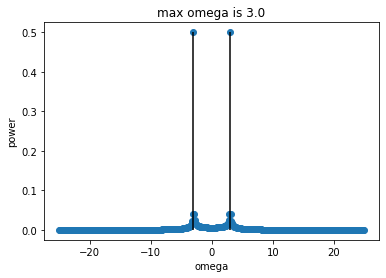

In [17]:
maxpower_wrt_omega = data.values.argmax(axis=0)
maxpower_wrt_omega = [data.values[maxpower_wrt_omega[i],i] for i in range(len(sample_freq))]
plt.scatter(sample_freq, maxpower_wrt_omega)
plt.vlines(x=sample_freq[np.array(maxpower_wrt_omega).argmax()],
           ymin=0,
           ymax=maxpower_wrt_omega[np.array(maxpower_wrt_omega).argmax()])
plt.vlines(x=-1*sample_freq[np.array(maxpower_wrt_omega).argmax()],
           ymin=0,
           ymax=maxpower_wrt_omega[np.array(maxpower_wrt_omega).argmax()])
plt.ylabel("power")
plt.xlabel("omega")
plt.title("max omega is {}".format(sample_freq[np.array(maxpower_wrt_omega).argmax()]))
plt.show();

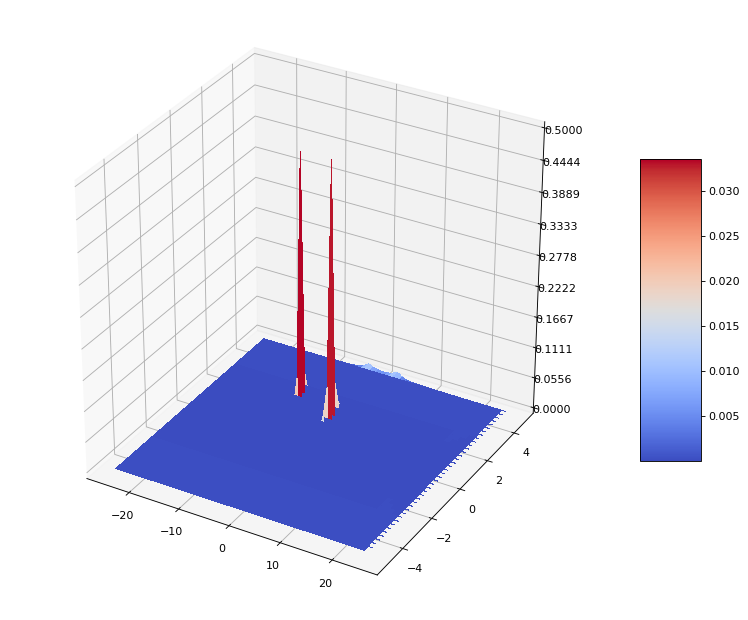

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.gca(projection='3d')

# Make data.
X = sample_freq
Y = alphas
X, Y = np.meshgrid(X, Y)

Z = data.values

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()